# \begin{equation}\ell_{1} \text { 约束 Huber 损失最小化 }\end{equation}

1. 初始化参数 $\boldsymbol{\theta},$ 比如随机地或通过普通最小二乘
$$
\boldsymbol{\theta\leftarrow\Phi^{\dagger}}y
$$
2. 从当前解 $\boldsymbol{\theta}$ 中计算权重矩阵 $W$ 和正则化矩阵 $\boldsymbol{\Theta}$ :
$$
W=\operatorname{diag}\left(w_{1}, \cdots, w_{n}\right) \quad \text { 且 } \quad \boldsymbol{\Theta}=\operatorname{diag}\left(\left|\theta_{1}\right|, \cdots,\left|\theta_{b}\right|\right)
$$
这里的权重 $w_{i}$ 使用残差 $r_{i}=y_{i}-f_{\theta}\left(x_{i}\right)$ 定义
$$
w_{i}=\left\{\begin{array}{ll}
1 & \left|r_{i}\right| \leqslant \eta \\
\eta /\left|r_{i}\right| & \left|r_{i}\right|>\eta
\end{array}\right.
$$
3. 基于权重矩阵 $W$ 和正则化矩阵 $\boldsymbol{\Theta}$ 计算解 $\boldsymbol{\theta}$ :
$$
\boldsymbol{\theta}\leftarrow\left(\boldsymbol{\Phi}^{\mathrm{T}} W \boldsymbol{\Phi}+\lambda \boldsymbol{\Theta}^{\dagger}\right)^{-1} \boldsymbol{\Phi}^{\dagger} W \boldsymbol{y}
$$
4. 重复迭代 $2-3$ 步，直到收敘。

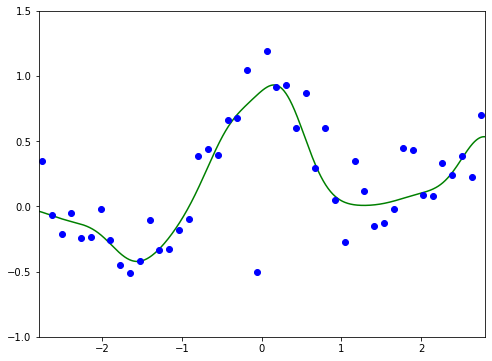

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n = 50
x = np.linspace(-3,3,n)
pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)
y[24] = -0.5
hh=2 * 0.3**2
l=0.1  # 正则化系数lambda
e=0.1  # 分界线eta
t=np.random.randn(n) # 初始化theta
x2=x**2
k=np.exp(-(np.tile(x2,(n,1)).T+np.tile(x2,(n,1))-2*np.dot(x.reshape(n,1),x.reshape(1,n)))/hh) # 高斯核函数
for i in range(5000):
    r = np.abs(np.dot(k,t)-y)
    w = np.ones(n)
    w[r>e] = e/r[r>e]
    Z=np.dot(k,np.tile(w,(n,1)).T*k)+l*np.linalg.pinv(np.diag(np.abs(t)))
    t0=np.dot(np.linalg.pinv(Z),np.dot(k,w*y))
    if np.linalg.norm(t-t0)<0.001:
        break
    t = t0
    
N=1000
X=np.linspace(-3,3,N)
K=np.exp(-(np.tile(X**2,(n,1)).T+np.tile(x2,(N,1))-2*np.dot(X.reshape(N,1),x.reshape(1,n)))/hh)
F=np.dot(K,t)
plt.figure(figsize=(8,6))
plt.axis([-2.8,2.8,-1,1.5])
plt.plot(X,F,'g-')
plt.plot(x,y,'bo')

In [5]:
t[t<1e-10]=0

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57161424e-09, 3.14551411e-08,
       7.85104851e-06, 2.96704737e-01, 2.22870601e-01, 2.19044748e-02,
       8.36131996e-03, 1.05645274e-01, 2.96861895e-01, 4.40968018e-01,
       2.18017398e-02, 4.63334981e-04, 2.17612930e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.17580304e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.17925544e-06,
       0.00000000e+00, 8.28453119e-02, 9.68672271e-04, 4.27132196e-09,
       0.00000000e+00, 0.00000000e+00, 1.06507927e-06, 3.61882596e-01,
       1.78610721e-01, 9.18948945e-10])

In [7]:
t == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False, False])

In [8]:
sum(t==0)

28